In [1]:
#import stuff!
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

<b>Theory<b>

In [15]:
#Setting up Constants
j = (-1)**(1/2)
R0 = 10000 #Voltage-Setting Resistor [Ohms]
R1 = 200 #Parallel Resistor [Ohms]
R2 = 20 #Series Resistor [Ohms]
C = 0.00022 #Capacitor [Farads]
V0_in = 0.707 #Voltage In [V]

#creating shorthands
R = R2/(R1+R2) #Based on equivalent resistance (unitless)
I0 = V0_in/R0 #I calculated from VAC [A]
wc = 1/((R1+R2)*C) #shorthand frequency constant [rad/s]

#Creating Arrays
f0 = [i for i in range(80000)] #Creating a range of (linear) frequencies [Hz]

w0 = []
for i in f0:
    w0.append(2*np.pi*f0[i])

In [16]:
#Running Loops for Functions


#Impedance Function
#Z = []
#for i in w:
#    Z.append(R1*(1+i**2*R2(R1+R2)-j*i*C*R1)/(1+i*2*C**2*(R1+R2)**2))
    
#Real(Z)
ReZ = []
for i in w0:
    ReZ.append(R1*(1+i**2*C**2*R2*(R1+R2))/(1+i**2*C**2*(R1+R2)**2))

#Imaginary(Z)
ImZ = []
for i in w0:
    ImZ.append(-R1*i*C*R1/(1+i**2*C**2*(R1+R2)**2))
    
#Phase
Ph = []
i = 0
while i < len(ImZ):
    Ph.append(np.arctan(ImZ[i]/ReZ[i]))
    i += 1

#|Z|
i = 0
MagZ = []
while i < len(ImZ):
    MagZ.append((ReZ[i]**2+ImZ[i]**2)**(1/2))
    i += 1

#Voltage
V0 = []
for i in MagZ:
    V0.append(I0*i)

<b>Data<b>

In [17]:
#Set up data. Keep data all in the same order! Also, make sure units are converted to SI first.

#frequency - Hz
f = [96, 268, 630, 995, 1720, 2114, 2665, 3193, 3570, 4460, 5047, 6195, 7531, 8357, 9258, 12430, 20745, 30710, 47920, 61646, 78095]
#V_0rms - mV, must be converted
V_mV = [14.22, 14.16, 13.95, 13.56, 12.47, 11.81, 10.88, 10.05, 9.48, 8.32, 7.65, 6.60, 5.67, 5.22, 4.8, 3.78, 2.58, 2.08, 1.8, 1.77, 1.81]
#phase - Degrees, must be converted
P_deg = [-1.3,-3.8,-9.9,-15.1,-24.3,-28.7,-33.8,-37.8,-40.2,-44.3,-46.3,-48.5,-49.8,-49.8,-49.7,-47.7,-37.5,-24.6,-6.2,+5.5,+16.1]

P = [] #Phase in radians
for n in P_deg:
    P.append(2*np.pi*n/360)
    
V = [] #Voltage in Volts
for n in V_mV:
    V.append(n*10**-3)
    
P_inv = [] #negative of phase
for n in P:
    P_inv.append(-n)

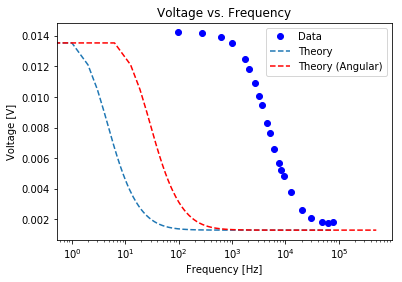

In [25]:
#plotting - Voltage vs Frequency

fig, sp = plt.subplots()

plt.title('Voltage vs. Frequency')
sp.plot(f,V,'bo',label='Data')
sp.plot(f0,V0,'--',label='Theory')
sp.plot(w0,V0,'r--',label='Theory (Angular)')
legend = sp.legend(loc='upper right')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Voltage [V]')
plt.xscale('log')

plt.show()

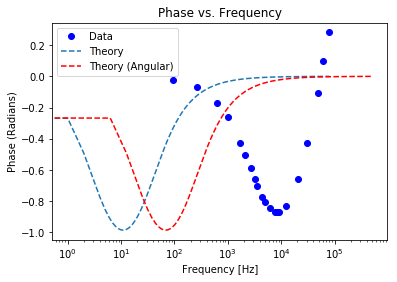

In [24]:
#Plotting - Phase vs Frequency

fig, sp = plt.subplots()

plt.title('Phase vs. Frequency')
sp.plot(f,P,'bo',label='Data')
sp.plot(f0,Ph,'--',label='Theory')
sp.plot(w0,Ph,'r--',label='Theory (Angular)')
legend = sp.legend(loc='upper left')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase (Radians)')
plt.xscale('log')

plt.show()

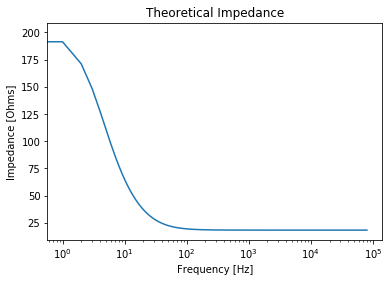

In [26]:
plt.plot(f0,MagZ)
#plt.axis([0,100,0,200])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Impedance [Ohms]')
plt.title('Theoretical Impedance')
plt.xscale('log')
plt.show()

In [1]:
#Things to fit with respect to: R0f, R1f, R2f, Cf
#variable is f

#V_fit = (V0_in/R0f)*((1+(2*np.pi*f)**2*Cf**2*R2f*(R1f+R2f))**2+(2*np.pi*f*Cf*R1f)**2)**(1/2)/(1+(2*np.pi*f)**2*Cf**2*(R1f+R2f)**2)
#Ph_fit = np.atan(-R1f*2*np.pi*f*Cf/(1+(2*np.pi*f)**2*Cf**2*(R1f+R2f)**2))